### Check if configuration has been run already and change directory to repository root:

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
import datajoint as dj
import os
import pandas as pd
import json
import pathlib
import u19_pipeline.automatic_job.recording_handler as rec_handler
import u19_pipeline.automatic_job.recording_process_handler as rec_process_handler


from u19_pipeline import recording, ephys_rec

#import utility.dj_shortcuts as dj_short
#import utility.acquisition_pipeline_handler as aph
dj.__version__

Connecting alvaros@datajoint00.pni.princeton.edu:3306


'0.13.2'

In [3]:
#Generate ssh key


#Steps on windows machine
#   PowerShell
#     Add-WindowsCapability -Online -Name OpenSSH.Server~~~~0.0.1.0
#     Start-Service sshd
#     Set-Service -Name sshd -StartupType 'Automatic'
# Copy ssh key pub to ~\.ssh\authorized_keys
# Modify C:\ProgramData\ssh\sshd_config
#   Uncomment
#       PasswordAuthentication no
#       StrictModes no
#       AuthorizedKeysFile	.ssh/authorized_keys
#   Comment
#       Match Group administrators
#           AuthorizedKeysFile __PROGRAMDATA__/ssh/administrators_authorized_keys
#   PowerShell
#         restart-service sshd


# Read environment variables
host = '128.112.222.127'
username = 'admin'
password = ''
ssh_key_filepath = '/Users/alvaros/.ssh/id_rsa_copyfiles'
remote_path = 'c:/Data/msiniscalchi/data/mjs20_09'

local_file_directory = '/Users/alvaros/Documents'

In [4]:
recording.StatusRecordingDefinition()

status_recording_idx status in the automate process pipeline,status_definition Status definition
-1,Error in recording handling
0,New recording
1,Recording directory transfer to PNI requested
2,Recording directory transferred to PNI
3,modality ingestion & Syncing jobs done


In [3]:
df_params = pd.DataFrame(recording.PreprocessParamSet.fetch(as_dict=True))
df_params

/Users/alvaros/opt/anaconda3/envs/u19_datajoint/lib/python3.7/site-packages/datajoint/blob.py:385: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (self.squeeze(np.array(result).reshape(shape, order="F"), convert_to_scalar=False)).view(MatCell)


,preprocess_paramset_idx,recording_modality,preprocess_paramset_desc,preprocess_paramset_hash,preprocess_paramset
0,1,imaging,caiman load,be352962-ac99-22f9-12ae-7a2ae519c3c6,"[[[['spock'], ['load'], ['caiman']]]]"
1,2,imaging,caiman trigger,05b0abe4-0f57-8106-d811-ada3cd3c3883,"[[[['spock'], ['trigger'], ['caiman']]]]"
2,3,imaging,suite2p load,9874904b-f10c-b941-8cf1-5d9503bf207e,"[[[['spock'], ['load'], ['suite2p']]]]"
3,4,imaging,suite2p trigger,b10ce90f-97f0-471b-6514-177fbdbcd83b,"[[[[[0.]], ['spock'], ['trigger'], ['suite2p']]]]"
4,5,electrophysiology,tiger kilosort,b0f85ad6-a5bc-2ff5-b6b6-0fecf4523db1,"[[[[[0.]], ['tiger'], ['kilosort2']]]]"
5,6,electrophysiology,cat_gt complete params,38dfe601-8771-0b15-b83f-4057287b36b0,"[[[[[(array([[1.]]), rec.array([[(MatCell([['b..."


In [8]:

fake_recording = dict()
fake_recording['recording_modality'] = 'electrophysiology'
fake_recording['location'] = 'Bezos1'
fake_recording['status_recording_idx'] = 0
fake_recording['process_paramset_idx'] = 1
fake_recording['preprocess_paramset_idx'] = 3
fake_recording['recording_directory'] = 'ms81/ms81_M004/20210507/towersTask_g0'
fake_recording['local_directory'] = 'ms81/ms81_M004/20210507/towersTask_g0'

#recording.Recording.insert1(fake_recording, skip_duplicates=True)

In [5]:
fake_recording = dict()
fake_recording['recording_modality'] = 'imaging'
fake_recording['location'] = 'Bezos1'
fake_recording['status_recording_idx'] = 0
fake_recording['process_paramset_idx'] = 1
fake_recording['preprocess_paramset_idx'] = 3
fake_recording['recording_directory'] = 'emdia/emdia_gps24/20220111'
fake_recording['local_directory'] = 'emdia/emdia_gps24/20220111'

#recording.Recording.insert1(fake_recording, skip_duplicates=True)


In [5]:
params = {
 "cat_gt": {
    "use_cat_gt": 1,
    "cat_gt_params": {
      "apfilter": ["biquad",2,300,0],
      "gfix": [0.40,0.10,0.02],
      "extras": ["prb_fld", "t_miss_ok", "ap", "gblcar", "out_prb_fld"]
   }
 },
"process_cluster": "tiger",
"process_repository": "BrainCogsEphysSorters",
"process_script": "main_script.py",
"clustering_method": "Kilosort2"
}

key = dict()
key['preprocess_paramset_idx'] = 6
key['preprocess_paramset'] = params


(recording.PreprocessParamSet).update1(key)

In [12]:
params = {
 "fs": 30000,
 "fshigh": 150,
 "minfr_goodchannels": 0.1,
 "Th": [10, 4],
 "lam": 10,
 "AUCsplit": 0.9,
 "minFR": 0.02,
 "momentum": [20, 400],
 "sigmaMask": 30,
 "ThPre": 8,
 "CAR": 1, 
 "spkTh": -6,
 "reorder": 1,
 "nskip": 25,
 "GPU": 1,
 "Nfilt": 1024,
 "nfilt_factor": 4,
 "ntbuff": 64,
 "NT": 32832,
 "whiteningRange": 32,
 "nSkipCov": 25,
 "scaleproc": 200,
 "nPCs": 3,
 "useRAM": 0,
 "trange": [0, 1000000000],
"NchanTOT": 384
}


key = dict()
key['process_paramset_idx'] = 1
key['process_paramset'] = params


(recording.ProcessParamSet).update1(key)

In [4]:
recording.Recording.proj('recording_modality')

recording_id Unique number assigned to each recording,"recording_modality modalities for recording (ephys, imaging, video_recording, etc.)"
16,electrophysiology
17,electrophysiology
18,electrophysiology
19,electrophysiology
26,electrophysiology
30,electrophysiology
1,imaging
2,imaging
3,imaging
4,imaging


In [4]:
key = 'recording_id >= 31'

(ephys_rec.EphysRecording & key).delete()

(recording.RecordingProcess & key).delete()

Deleting 27 rows from `u19_ephys_rec`.`ephys_processing`
Deleting 27 rows from `u19_ephys_rec`.`__ephys_recording_probes`
Deleting 11 rows from `u19_ephys_rec`.`__ephys_recording`
Deletes committed.
Deleting 27 rows from `u19_recording`.`recording_process`
Deletes committed.


27

In [5]:
l = rec_handler.RecordingHandler.pipeline_handler_main()

function to apply: modality_preingestion
this_modality_recording_table <class 'u19_pipeline.ephys_rec.EphysRecording'>
............... before 
{'recording_id': 31}
probe_dirs ms81/ms81_M003/20210507/towersTask_g0/towersTask_g0_imec0
probe_dirs ms81/ms81_M003/20210507/towersTask_g0/towersTask_g0_imec1
recording_units [{'recording_id': 31, 'probe': 0, 'probe_directory': 'ms81/ms81_M003/20210507/towersTask_g0/towersTask_g0_imec0'}, {'recording_id': 31, 'probe': 1, 'probe_directory': 'ms81/ms81_M003/20210507/towersTask_g0/towersTask_g0_imec1'}]
this_recprocess_key {'recording_id': 31, 'preprocess_paramset_idx': 6, 'process_paramset_idx': 1, 'fragment_number': 0, 'recording_process_pre_path': 'ms81/ms81_M003/20210507/towersTask_g0/towersTask_g0_imec0', 'status_pipeline_idx': 0}
recording_process [80]
this_mod_processing {'recording_id': 31, 'probe': 0, 'recording_process_id': 80}
this_recprocess_key {'recording_id': 31, 'preprocess_paramset_idx': 6, 'process_paramset_idx': 1, 'fragment_numb

In [24]:
sala = '/ldsldlsd'
if sala[0] == '/':
    sala = sala[1:]

sala

'ldsldlsd'

In [4]:
l = rec_handler.RecordingHandler.pipeline_handler_main()

In [7]:
l = rec_process_handler.RecProcessHandler.pipeline_handler_main()

scp u19_pipeline/automatic_job/ParameterFiles/preprocess_paramset_74.json alvaros@tigergpu.princeton.edu:/scratch/gpfs/BRAINCOGS/ParameterFiles/preprocess_paramset_74.json
0
scp u19_pipeline/automatic_job/ParameterFiles/process_paramset_74.json alvaros@tigergpu.princeton.edu:/scratch/gpfs/BRAINCOGS/ParameterFiles/process_paramset_74.json
0
scp u19_pipeline/automatic_job/SlurmFiles/slurm_real.slurm alvaros@tigergpu.princeton.edu:/scratch/gpfs/BRAINCOGS/SlurmFiles/slurm_real.slurm
0
['ssh', 'alvaros@tigergpu.princeton.edu', 'sbatch', "--export=recording_process_id=74,raw_data_directory='ms81/ms81_M012/20211210/2021-12-10_g0/2021-12-10_g0_imec0/',processed_data_directory='ms81/ms81_M012/20211210/2021-12-10_g0/2021-12-10_g0_imec0/recording_process_id_74',repository_dir='/scratch/gpfs/BRAINCOGS/electorphysiology_processing/BrainCogsEphysSorters',process_script_path='main_script.py'", '/scratch/gpfs/BRAINCOGS/SlurmFiles/slurm_real.slurm']
stdout Submitted batch job 8382599

stderr 
p.returnc

In [8]:
keyo = dict()
keyo['preprocess_paramset_idx'] = 1
a = recording.PreprocessParamSet()
lo = a.get_preprocess_params(keyo)

keyo2 = dict()
keyo2['process_paramset_idx'] = 1
b = recording.ProcessParamSet()
lu = b.get_process_params(keyo2)



[[(array([[2.]]), array(['kilosort2'], dtype='<U9'))]]
<class 'datajoint.blob.MatStruct'>
soy ndarray
soy ndarray


In [9]:
lo

{'cat_gt': 2, 'sorting_algorithm': 'kilosort2'}

In [21]:
diro = os.getcwd()
param_file = str(pathlib.Path(diro, 'u19_pipeline', 'automatic_job', 'process_params_examples', 'preprocess_params_example.json'))
f = open(param_file)
param_dict = json.load(f)
param_dict

keyu = dict()
keyu['preprocess_paramset_idx'] = 1
keyu['preprocess_paramset'] = param_dict
a.update1(keyu)

In [67]:
ws.columns

Index(['cat_gt', 'sorting_algorithm'], dtype='object')

In [6]:
recording.Recording()

recording_id Unique number assigned to each recording,"recording_modality modalities for recording (ephys, imaging, video_recording, etc.)",location,status_recording_idx status in the automate process pipeline,preprocess_paramset_idx,process_paramset_idx,task_copy_id_pni id for globus transfer task raw file local->cup,inherit_params_recording all RecordingProcess from a recording will have same paramSets,recording_directory relative directory where the recording will be stored on cup,local_directory local directory where the recording is stored on system
2,electrophysiology,Bezos1,3,1,1,None,1,ms81/ms81_M004/20210507/towersTask_g0,ms81/ms81_M004/20210507/towersTask_g0
3,electrophysiology,Bezos1,3,1,1,None,1,ms81/ms81_M004/20210507/towersTask_g0,ms81/ms81_M004/20210507/towersTask_g0
4,imaging,Bezos1,3,2,1,None,1,emdia/emdia_gps24/20220111,emdia/emdia_gps24/20220111


In [7]:
ephys.EphysRecordingProbes()

recording_id Unique number assigned to each recording,probe probe number for the recording,probe_directory probe specific directory
2,0,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec0/
2,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec1/
3,0,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec0/
3,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec1/


### Declare AutoPipeline and Status tables if they don't exist

In [8]:
ephys.EphysProcessing()

recording_process_id Unique number assigned to each processing job for a recording unit,recording_id Unique number assigned to each recording,probe probe number for the recording
16,2,0
17,2,1
18,3,0
19,3,1


In [9]:
imaging_rec.Scan()


recording_id Unique number assigned to each recording
4


In [10]:
imaging_rec.ScanInfo()

recording_id Unique number assigned to each recording,file_name_base base name of the file,scan_width width of scanning in pixels,scan_height height of scanning in pixels,acq_time acquisition time,n_depths number of depths,scan_depths depth values in this scan,frame_rate imaging frame rate,inter_fov_lag_sec time lag in secs between fovs,frame_ts_sec frame timestamps in secs 1xnFrames,channels is this the channer number or total number of channels,cfg_filename cfg file path,usr_filename usr file path,fast_z_lag fast z lag,fast_z_flyback_time time it takes to fly back to fov,line_period scan time per line,scan_frame_period,scan_volume_rate,flyback_time_per_frame,flyto_time_per_scan_field,"fov_corner_points coordinates of the corners of the full 5mm FOV, in microns",nfovs number of field of view,nframes number of frames in the scan,nframes_good number of frames in the scan before acceptable sample bleaching threshold is crossed,last_good_file number of the file containing the last good frame because of bleaching,motion_correction_enabled,motion_correction_mode,stacks_enabled,stack_actuator,stack_definition
4,emdia/emdia_gps24/20220111/gps24_20220111_mainrecording_00001_00001.tif,512,1588,2022-01-11 00:00:00,1,=BLOB=,14.3005,0.001,=BLOB=,=BLOB=,C:\Users\admin\Documents\MATLAB\MikaToo.cfg,C:\Users\admin\Documents\MATLAB\Mika.usr,0.0008,0.004,4.14754e-05,0.0699276,14.3005,0.001,0.001,=BLOB=,3,51468,36000,18,1,automated,1,fastZ,arbitrary


In [11]:
imaging_rec.ImagingProcessing()

recording_process_id Unique number assigned to each processing job for a recording unit,recording_id Unique number assigned to each recording,fov number of the field of view in this scan
27,4,1
28,4,2
29,4,3


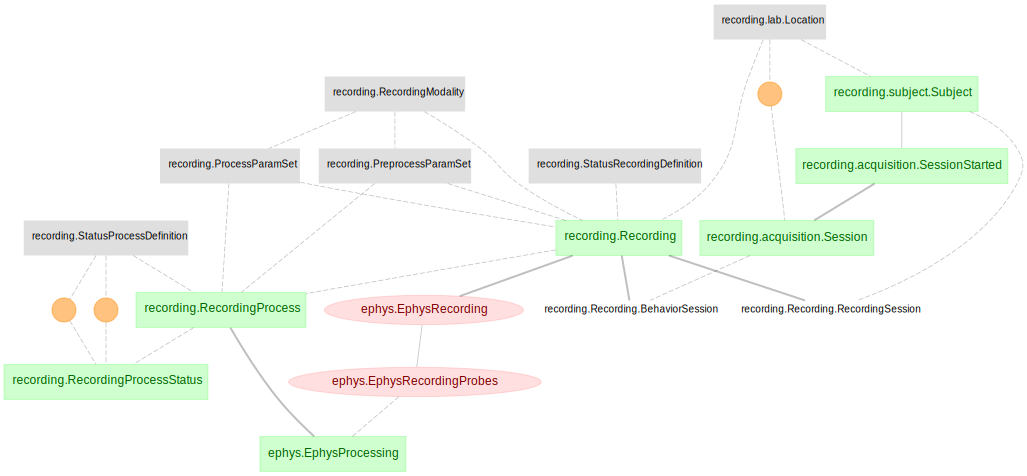

In [12]:
dj.ERD(recording) -1 + dj.ERD(ephys.EphysRecording) + dj.ERD(ephys.EphysProcessing)


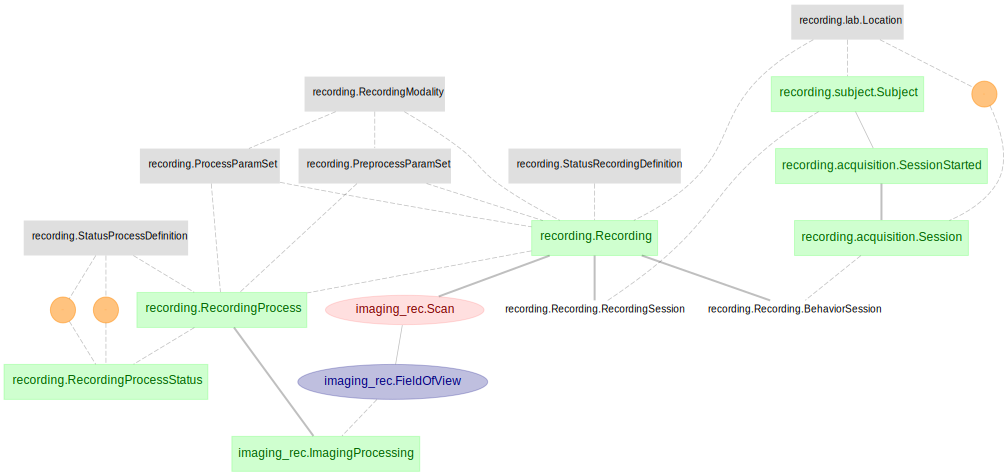

In [13]:
dj.ERD(recording) -1 + dj.ERD(imaging_rec.Scan) + dj.ERD(imaging_rec.ImagingProcessing) 


In [14]:
s =dj.conn()
s

DataJoint connection (connected) alvaros@datajoint00.pni.princeton.edu:3306

In [15]:
s.close()

In [89]:
dicto2 = [] 
dicto = dict()
dicto['wala'] = 1
dicto['walad'] = 2

dictos = dict()
dictos['wala'] = 3
dictos['walad'] = 4


dicto2.append(dicto)
dicto2.append(dictos)


In [90]:
str(dicto2)

"[{'wala': 1, 'walad': 2}, {'wala': 3, 'walad': 4}]"

In [81]:
l = [[k + '=' + str(v) for k,v in x.items()] for x in dicto2]
flat_list = ['('+' and '.join(sublist)+')' for sublist in l]
flat_list

['(wala=1 and walad=2)']

In [78]:
soo = ' or '.join(flat_list)
soo

'(wala=1 and walad=2)'

[['wala', 'walad'], ['wala', 'walad']]

In [91]:
def get_string_key(key):

    str_key = ''
    if isinstance(key, list):
        key_l = [[k + '=' + str(v) for k,v in x.items()] for x in key]
        flat_list = ['('+' and '.join(sublist)+')' for sublist in key_l]
        str_key = ' or '.join(flat_list)
    elif isinstance(key, dict):
        str_key = [k + '=' + str(v) for k,v in key.items()] 
    elif isinstance(key,str):
        str_key = key
    
    return str_key

In [92]:
get_string_key(dicto2)

'(wala=1 and walad=2) or (wala=3 and walad=4)'

In [4]:
so = imaging_rec.ScanInfo()

In [5]:
key = dict()
key['recording_id'] = 4

so.ingest(key)

['/usr/people/alvaros/BrainCogsProjects/Datajoint_projs/U19-pipeline_python/u19_pipeline/automatic_job/ingest_scaninfo_shell.sh', '/usr/people/alvaros/BrainCogsProjects/Datajoint_projs/U19-pipeline-matlab/scripts', 'recording_id=4']
aftercommand before comm
aftercommand after comm

                                                                              < M A T L A B (R) >
                                                                    Copyright 1984-2020 The MathWorks, Inc.
                                                                R2020b Update 1 (9.9.0.1495850) 64-bit (glnxa64)
                                                                               September 30, 2020

 
To get started, type doc.
For product information, visit www.mathworks.com.
 

s =

     0

 0:  datajoint00.pni.princeton.edu via TCP/IP   Server version 5.5.5-10.2.33-MariaDB (encrypted)
database connection id: 64946
imaging_rec.ScanInfo: Nothing to populate




In [3]:
imaging = dj.create_virtual_module('imaging', 'u19_imaging')

In [4]:
keyo = dict()
keyo['subject_fullname'] = 'emdia_teto6s_12'
keyo['session_date'] = '2021-11-12'


In [6]:
(imaging.Scan & keyo).delete()

Deleting 3 rows from `u19_imaging`.`__sync_imaging_behavior`
Deleting 87 rows from `u19_imaging`.`_field_of_view__file`


DataJointError: Cannot declare new tables inside a transaction, e.g. from inside a populate/make call

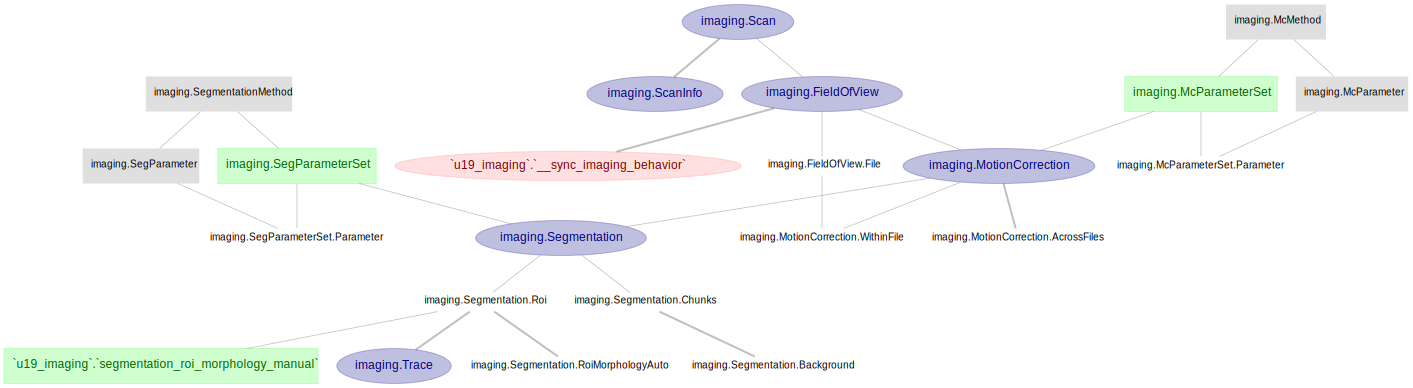

In [11]:
dj.Diagram(imaging)

In [10]:
import traceback
import sys
try:
    raise Exception('spam', 'eggs')
except BaseException as e:
    print('Nos salvamos')
    print(traceback.format_exc())


Nos salvamos
Traceback (most recent call last):
  File "/tmp/ipykernel_6488/1491040166.py", line 4, in <module>
    raise Exception('spam', 'eggs')
Exception: ('spam', 'eggs')

(<class 'Exception'>, Exception('spam', 'eggs'), <traceback object at 0x7f877dc35f00>)
